In [15]:
import warnings;
warnings.simplefilter('ignore')

## Installation

In [16]:
# !pip install pystan fbprophet
# !conda install -c conda-forge fbprophet -y

## Import Libraries

In [17]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from datetime import datetime

## Data-preprocessing

In [18]:
df = pd.read_csv('owid-covid-data.csv')
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [19]:
df = df[['location','date','new_cases']]
df.head()

,location,date,new_cases
0,Afghanistan,2020-02-24,5.0
1,Afghanistan,2020-02-25,0.0
2,Afghanistan,2020-02-26,0.0
3,Afghanistan,2020-02-27,0.0
4,Afghanistan,2020-02-28,0.0


In [20]:
df_sg = df.copy()
df_sg = df_sg[(df['location']=="Singapore")].reset_index()
df_sg = df_sg[['date','new_cases']]
df_sg.head()

,date,new_cases
0,2020-01-23,1.0
1,2020-01-24,2.0
2,2020-01-25,0.0
3,2020-01-26,1.0
4,2020-01-27,1.0


In [21]:
df_sg['date'] = pd.to_datetime(df_sg['date'],format='%Y-%m-%d')
df_sg.head()

,date,new_cases
0,2020-01-23,1.0
1,2020-01-24,2.0
2,2020-01-25,0.0
3,2020-01-26,1.0
4,2020-01-27,1.0


In [22]:
df_train = df_sg.copy()
df_train.columns = ['ds','y']
df_train.head()

,ds,y
0,2020-01-23,1.0
1,2020-01-24,2.0
2,2020-01-25,0.0
3,2020-01-26,1.0
4,2020-01-27,1.0


## Train Model

In [23]:
m = Prophet(interval_width=0.95)
model = m.fit(df_train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecast

In [24]:
future = m.make_future_dataframe(periods=183) #6 months from now
forecast = m.predict(future)
forecast

# yhat is the predicted forecast (extreme right)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-23,53.451009,-670.382135,797.386789,53.451009,53.451009,0.285198,0.285198,0.285198,0.285198,0.285198,0.285198,0.0,0.0,0.0,53.736206
1,2020-01-24,56.138614,-677.565848,781.104122,56.138614,56.138614,16.298081,16.298081,16.298081,16.298081,16.298081,16.298081,0.0,0.0,0.0,72.436696
2,2020-01-25,58.826220,-617.175729,798.293075,58.826220,58.826220,-1.887239,-1.887239,-1.887239,-1.887239,-1.887239,-1.887239,0.0,0.0,0.0,56.938981
3,2020-01-26,61.513826,-704.158160,772.777655,61.513826,61.513826,-12.138389,-12.138389,-12.138389,-12.138389,-12.138389,-12.138389,0.0,0.0,0.0,49.375437
4,2020-01-27,64.201431,-731.757383,813.107810,64.201431,64.201431,-28.414507,-28.414507,-28.414507,-28.414507,-28.414507,-28.414507,0.0,0.0,0.0,35.786924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,2022-04-16,4453.820957,3372.266020,5360.143632,3747.317834,5070.416312,-1.887239,-1.887239,-1.887239,-1.887239,-1.887239,-1.887239,0.0,0.0,0.0,4451.933717
815,2022-04-17,4468.714821,3534.595178,5357.958339,3755.414760,5090.469007,-12.138389,-12.138389,-12.138389,-12.138389,-12.138389,-12.138389,0.0,0.0,0.0,4456.576432
816,2022-04-18,4483.608685,3550.218364,5440.998025,3763.511686,5110.521702,-28.414507,-28.414507,-28.414507,-28.414507,-28.414507,-28.414507,0.0,0.0,0.0,4455.194178
817,2022-04-19,4498.502548,3475.329927,5504.891229,3771.608612,5130.574398,14.244758,14.244758,14.244758,14.244758,14.244758,14.244758,0.0,0.0,0.0,4512.747306


In [25]:
forecast[['ds','yhat']]

,ds,yhat
0,2020-01-23,53.736206
1,2020-01-24,72.436696
2,2020-01-25,56.938981
3,2020-01-26,49.375437
4,2020-01-27,35.786924
...,...,...
814,2022-04-16,4451.933717
815,2022-04-17,4456.576432
816,2022-04-18,4455.194178
817,2022-04-19,4512.747306


In [26]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

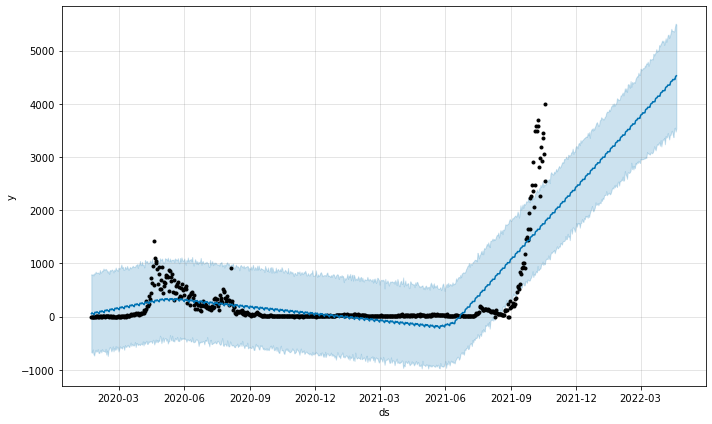

In [27]:
plot1 = m.plot(forecast)

Blue line represent predictions (yhat) and the shaded blue is within yhat upper & yhat lower

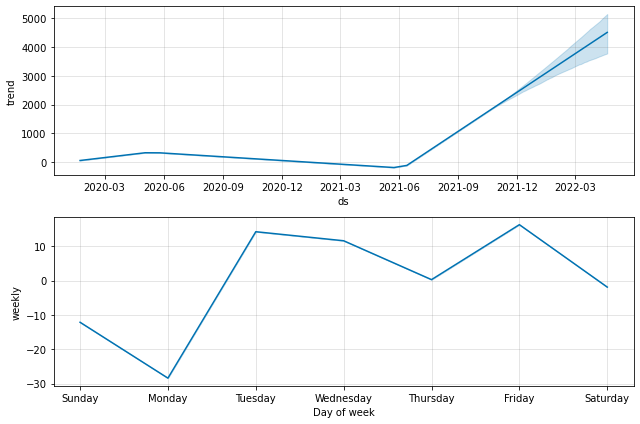

In [28]:
plot2 = m.plot_components(forecast)